In [1]:
from trajectory_analysis import *

c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\configuration_utils.py:335: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [2]:
embeddings_dict = load_embeddings("saved_embeds/conversation_embeddings.pkl")

In [3]:
#run emotional layers on the weapons data
speakers = ["andrew", "justine"]
emotional_dict = run_emotional_layers(embeddings_dict, speakers[0], speakers[1])

In [4]:
annotations = load_annotations_txt("annotations/weapons_ant.txt", speakers)
for speaker, utt_dict in annotations.items():
    print(f"Speaker: {speaker}")
    for utt_idx, text in utt_dict.items():
        print(f"  Utterance {utt_idx + 1}: {text}")
    print("-" * 30)

Speaker: andrew
  Utterance 3: formal
  Utterance 6: sounds like implying a trait
  Utterance 7: sounds like deflection to new direction
  Utterance 10: acknowledged against his implication
------------------------------
Speaker: justine
  Utterance 1: pleading
  Utterance 3: abrupt
  Utterance 4: pleading
  Utterance 6: responds to implication
  Utterance 7: very upset and annoyed
  Utterance 8: likely more upset
  Utterance 10: defeat
------------------------------


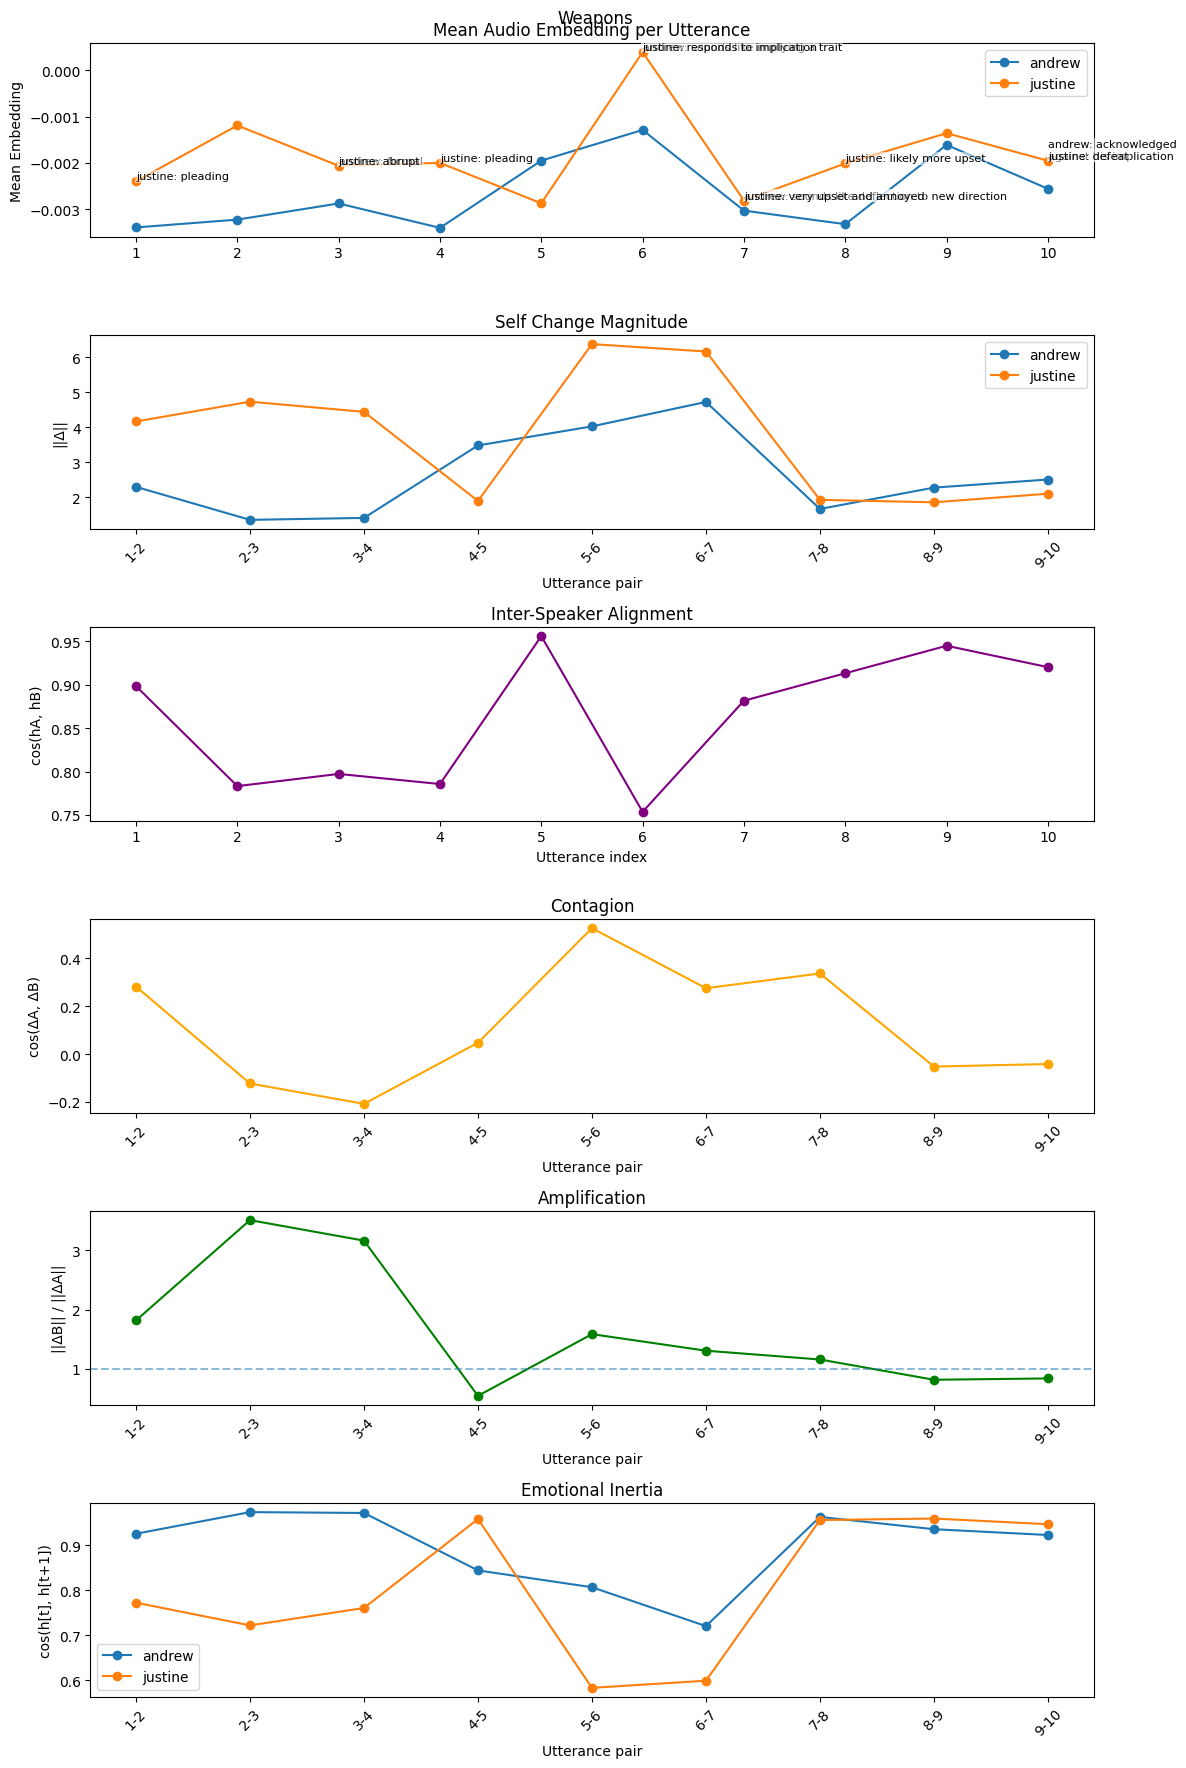

In [5]:
plot_emotional_layers(emotional_dict, speakers, scene_name="Weapons", annotations=annotations, embedding_dict=embeddings_dict)

In [6]:
generate_scene_summary_with_trends(emotional_dict, speakers)

andrew: fewer changes, experiences noticeable emotional shifts.
Reasoning:
mean_inertia=0.90 > 0.8693664338853624, mean_delta=2.63 < 3.4051333824793497
max_delta=4.72 > 3.4051333824793497
Per-utterance trends:
  larger than usual shift: utterances 4, 5, 6
  high alignment between speakers: utterances 1, 5, 7
  low change: utterances 8, 9
  notable_shift: utterances 4, 5, 6
--------------------------------------------------
justine: large changes, experiences noticeable emotional shifts.
Reasoning:
mean_delta=3.74 > 3.4051333824793497, mean_inertia=0.81 < 0.8693664338853624
max_delta=6.38 > 3.4051333824793497
Per-utterance trends:
  larger than usual shift: utterances 1, 2, 3, 5, 6
  high response magnitude: utterances 1, 2, 3
  high alignment between speakers: utterances 1, 5, 7
  low change: utterances 4, 8, 9
  notable_shift: utterances 1, 2, 3, 5, 6
--------------------------------------------------


{'andrew': {'summary': 'andrew: fewer changes, experiences noticeable emotional shifts.',
  'reasoning': 'mean_inertia=0.90 > 0.8693664338853624, mean_delta=2.63 < 3.4051333824793497\nmax_delta=4.72 > 3.4051333824793497',
  'trends': {'larger than usual shift': [3, 4, 5],
   'high response magnitude': [],
   'high alignment between speakers': [0, 4, 6],
   'low change': [7, 8],
   'notable_shift': [3, 4, 5]}},
 'justine': {'summary': 'justine: large changes, experiences noticeable emotional shifts.',
  'reasoning': 'mean_delta=3.74 > 3.4051333824793497, mean_inertia=0.81 < 0.8693664338853624\nmax_delta=6.38 > 3.4051333824793497',
  'trends': {'larger than usual shift': [0, 1, 2, 4, 5],
   'high response magnitude': [0, 1, 2],
   'high alignment between speakers': [0, 4, 6],
   'low change': [3, 7, 8],
   'notable_shift': [0, 1, 2, 4, 5]}}}